In [1]:
library(dplyr)
library(MASS)
library(olsrr)
library(car)

rm(list = ls())

setwd("C:\\Users\\Dick Sang\\Desktop\\5. Data Analytics\\3. PolyU RA\\1. Projects\\3. Cust Value Chain Analysis\\4. Regression\\1. 2020-01\\3. analysis")
data <- read.csv("Data Input for Analysis.csv")

#str(data)

Warning message:
"package 'dplyr' was built under R version 3.5.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Warning message:
"package 'olsrr' was built under R version 3.5.3"

Attaching package: 'olsrr'


The following object is masked from 'package:MASS':

    cement


The following object is masked from 'package:datasets':

    rivers


Warning message:
"package 'car' was built under R version 3.5.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.5.3"

Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




In [2]:
######################################################
# 1. Test models by absolute word count
######################################################
#--- 1a. By original sales (Symbolic words drive sales)
model <- glm(Sales_K_Unit ~ Functional + 
                            Experimental +
                            Symbolic +
                            Cost +
                            Functional : Optimistic +
                            Experimental : Optimistic +
                            # Symbolic : Optimistic +
                            Cost : Optimistic +
                            Functional : Affective +
                            Experimental : Affective +
                            # Symbolic : Affective +
                            Cost : Affective
          , data = data)
null_model <- glm(Sales_K_Unit ~ 1, data = data)

# final_model <- stepAIC(null_model, direction="forward",scope=list(upper=model,lower=null_model))
final_model <- stepAIC(model, direction="both")

Start:  AIC=581.55
Sales_K_Unit ~ Functional + Experimental + Symbolic + Cost + 
    Functional:Optimistic + Experimental:Optimistic + Cost:Optimistic + 
    Functional:Affective + Experimental:Affective + Cost:Affective

                          Df   Deviance    AIC
- Cost:Affective           1 4.5422e+10 579.56
- Functional:Affective     1 4.5424e+10 579.56
- Experimental:Affective   1 4.7605e+10 580.64
- Experimental:Optimistic  1 4.7817e+10 580.74
- Cost:Optimistic          1 4.9045e+10 581.32
<none>                       4.5413e+10 581.55
- Symbolic                 1 5.0929e+10 582.19
- Functional:Optimistic    1 5.2270e+10 582.79

Step:  AIC=579.56
Sales_K_Unit ~ Functional + Experimental + Symbolic + Cost + 
    Functional:Optimistic + Experimental:Optimistic + Cost:Optimistic + 
    Functional:Affective + Experimental:Affective

                          Df   Deviance    AIC
- Functional:Affective     1 4.5605e+10 577.65
- Experimental:Affective   1 4.7664e+10 578.67
- Experim

In [3]:
##########################################################
# fine-tune final model
##########################################################
final_model <- lm(Sales_K_Unit ~ Cost + Cost:Optimistic
                   , data = data)

summary(final_model)


Call:
lm(formula = Sales_K_Unit ~ Cost + Cost:Optimistic, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-68787 -43100 -14647  12434 168710 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     64389.975  29457.000   2.186   0.0409 *
Cost             -795.379    664.690  -1.197   0.2454  
Cost:Optimistic     6.274      2.705   2.319   0.0311 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66590 on 20 degrees of freedom
Multiple R-squared:  0.2808,	Adjusted R-squared:  0.2089 
F-statistic: 3.905 on 2 and 20 DF,  p-value: 0.03702


In [4]:
# model assumption - 
# 1. residual is normal: pass
ols_test_normality(final_model$residuals)$kolmogorv


	One-sample Kolmogorov-Smirnov test

data:  y
D = 0.19806, p-value = 0.2879
alternative hypothesis: two-sided


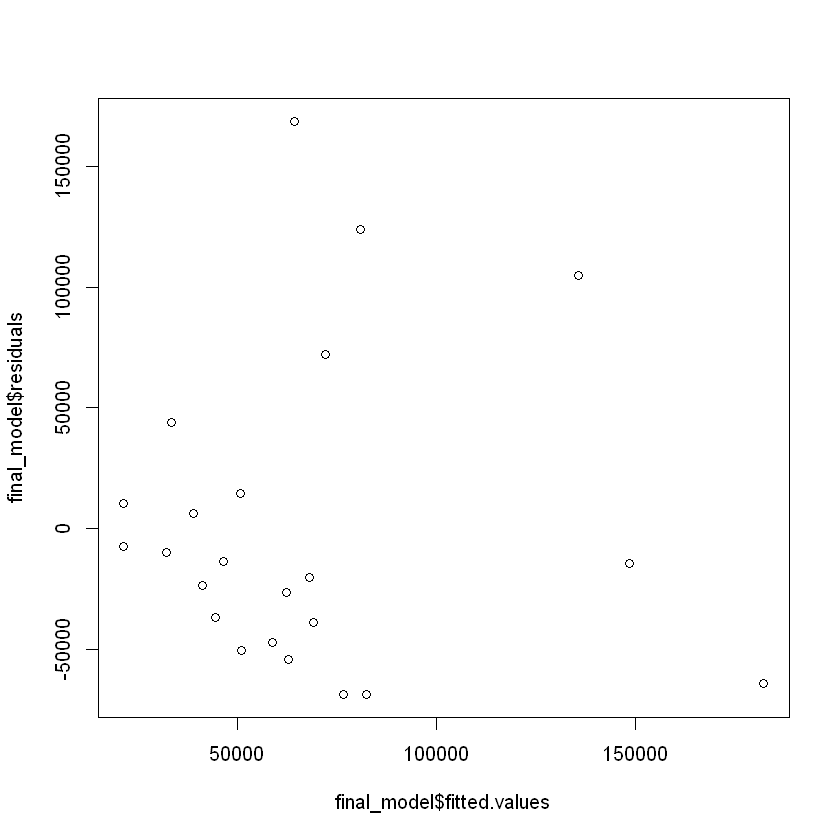

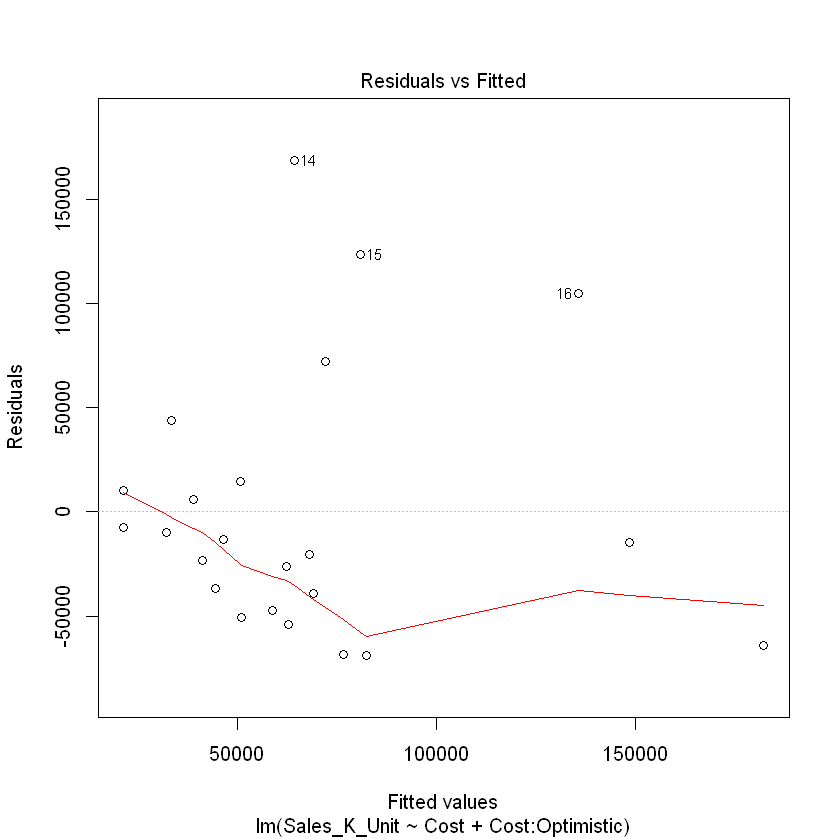

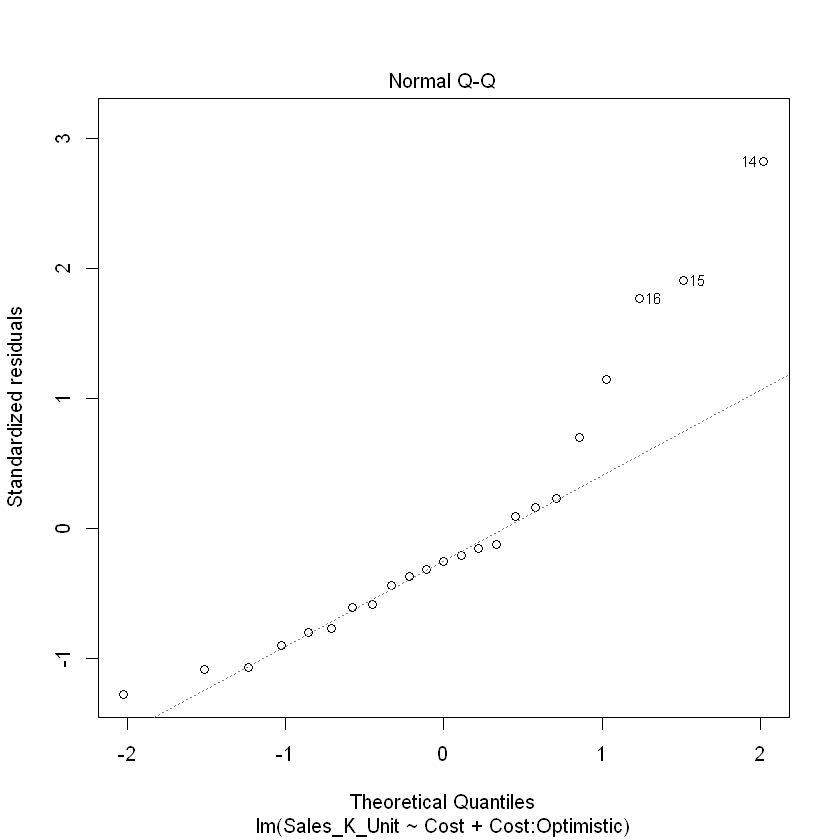

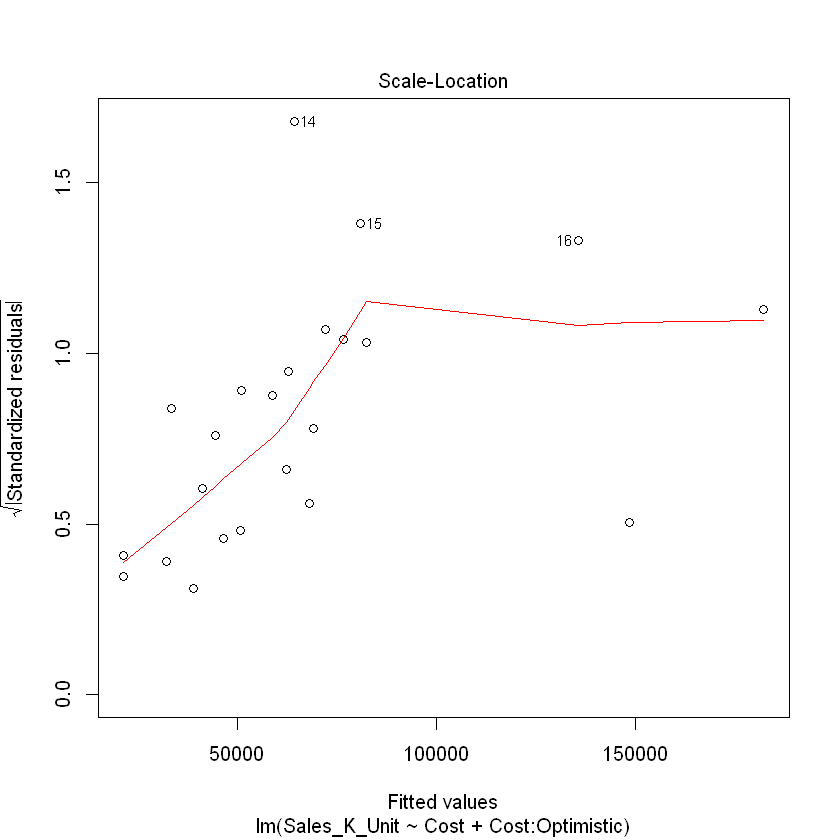

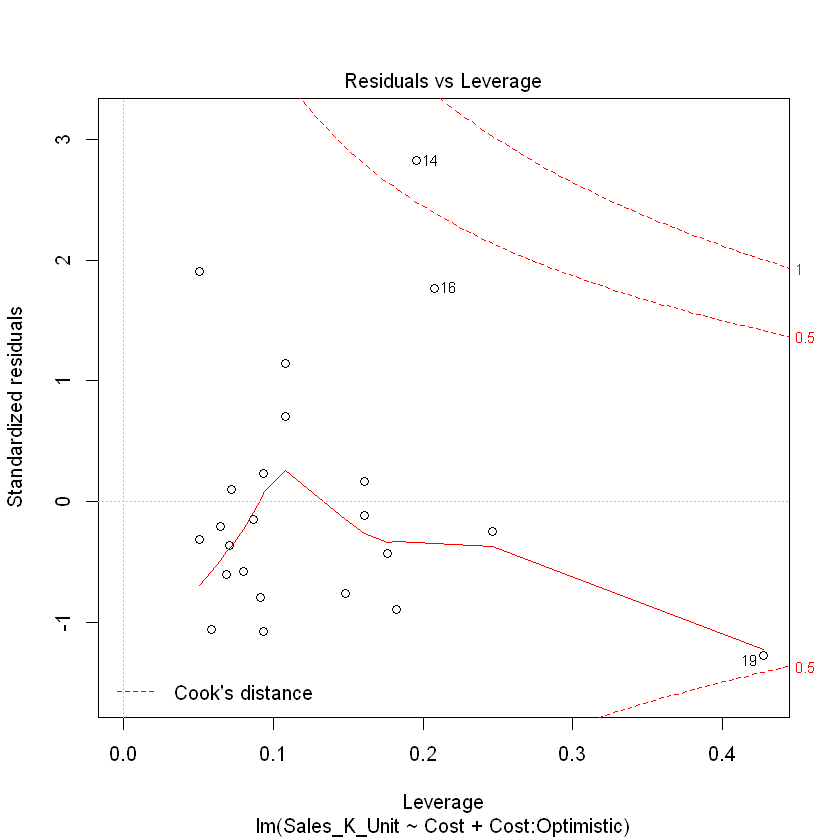

In [5]:
plot(final_model$fitted.values, final_model$residuals)
plot(final_model) # plot 1 is fitted vs residual, plot 2 is QQ plot: fairly normal residuals

In [6]:
# 2. Homoskedasticity: pass - variance is constant
ols_test_breusch_pagan(final_model)

#--- 1b. By Adjusted sales (No variables are significant - Not studied further)
# model <- glm(Adj_Sales ~ Functional + Experimental + Symbolic+ Cost, data = data)
# null_model <- glm(Adj_Sales ~ 1, data = data)
# 
# fwd_model <- stepAIC(null_model, direction="forward",scope=list(upper=model,lower=null_model))
# 
# summary(fwd_model)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                  Data                   
 ----------------------------------------
 Response : Sales_K_Unit 
 Variables: fitted values of Sales_K_Unit 

       Test Summary         
 ---------------------------
 DF            =    1 
 Chi2          =    1.675998 
 Prob > Chi2   =    0.195457 

Start:  AIC=584.85
Sales_K_Unit ~ WC_Normalize_Experimental + WC_Normalize_Cost + 
    WC_Normalize_Cost:WC_Normalize_Optimistic

                                            Df   Deviance    AIC
- WC_Normalize_Experimental                  1 9.9713e+10 583.64
- WC_Normalize_Cost:WC_Normalize_Optimistic  1 9.9893e+10 583.68
<none>                                         9.6351e+10 584.85

Step:  AIC=583.64
Sales_K_Unit ~ WC_Normalize_Cost + WC_Normalize_Cost:WC_Normalize_Optimistic

                                            Df   Deviance    AIC
- WC_Normalize_Cost:WC_Normalize_Optimistic  1 1.0176e+11 582.11
<none>                                         9.9713e+10 583.64

Step:  AIC=582.11
Sales_K_Unit ~ WC_Normalize_Cost

                    Df   Deviance    AIC
<none>                 1.0176e+11 582.11
- WC_Normalize_Cost  1 1.2333e+11 584.53



Call:
glm(formula = Sales_K_Unit ~ WC_Normalize_Cost, data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-78994  -47445  -19367   45515  168017  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         133280      34529    3.86 0.000908 ***
WC_Normalize_Cost -3416998    1619375   -2.11 0.047022 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 4845558234)

    Null deviance: 1.2333e+11  on 22  degrees of freedom
Residual deviance: 1.0176e+11  on 21  degrees of freedom
AIC: 582.11

Number of Fisher Scoring iterations: 2


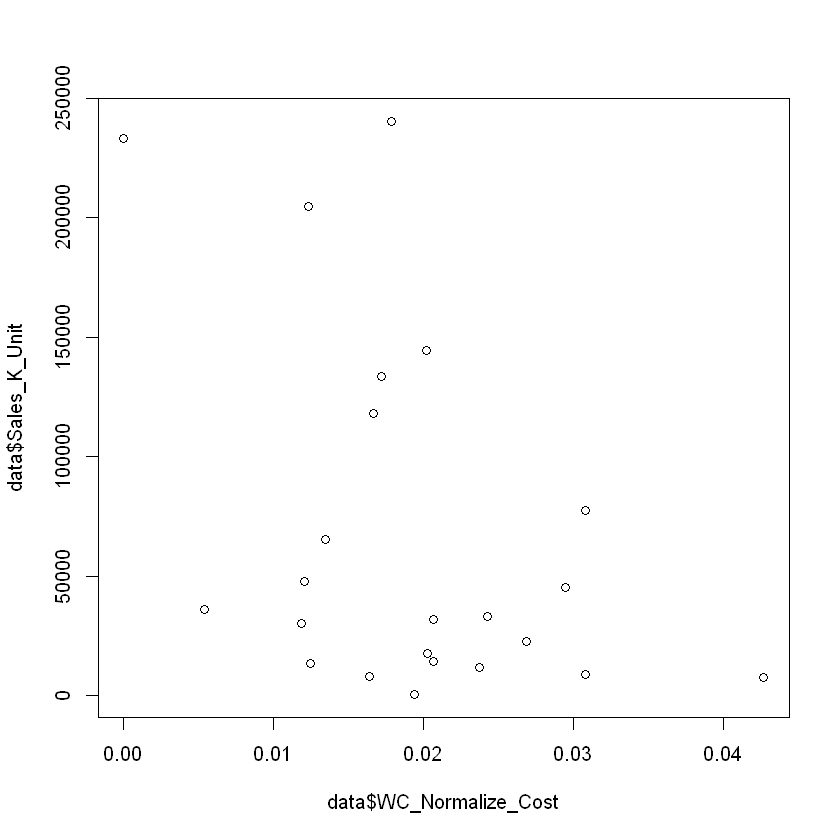

In [7]:
######################################################
# 2. Test models by absolute word count %
######################################################
plot(data$WC_Normalize_Cost, data$Sales_K_Unit)

#--- 2a. By original sales (Normalized Cost words drive sales)
model2 <- glm(Sales_K_Unit ~ 
                            # WC_Normalize_Functional + 
                            WC_Normalize_Experimental + 
                            # WC_Normalize_Symbolic + 
                            WC_Normalize_Cost +
                            # WC_Normalize_Functional: WC_Normalize_Optimistic+ 
                            # WC_Normalize_Experimental: WC_Normalize_Optimistic+ 
                            # WC_Normalize_Symbolic: WC_Normalize_Optimistic+ 
                            WC_Normalize_Cost: WC_Normalize_Optimistic
                            # WC_Normalize_Functional: WC_Normalize_Affective+ 
                            # WC_Normalize_Experimental: WC_Normalize_Affective
                            # WC_Normalize_Symbolic: WC_Normalize_Affective+ 
                            # WC_Normalize_Cost: WC_Normalize_Affective
             , data = data)

null_model2 <- glm(Sales_K_Unit ~ 1, data = data)

# final_model <- stepAIC(null_model, direction="forward",scope=list(upper=model,lower=null_model))
final_model2 <- stepAIC(model2, direction="backward")

summary(final_model2)

In [8]:
##########################################################
# fine-tune final model
##########################################################
final_model2 <- lm(Sales_K_Unit ~ WC_Normalize_Cost
                  , data = data)

summary(final_model2)


Call:
lm(formula = Sales_K_Unit ~ WC_Normalize_Cost, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-78994 -47445 -19367  45515 168017 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         133280      34529    3.86 0.000908 ***
WC_Normalize_Cost -3416998    1619375   -2.11 0.047022 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69610 on 21 degrees of freedom
Multiple R-squared:  0.1749,	Adjusted R-squared:  0.1356 
F-statistic: 4.452 on 1 and 21 DF,  p-value: 0.04702


In [9]:
# model assumption - 
# 1. residual is normal: pass
ols_test_normality(final_model2$residuals)$kolmogorv


	One-sample Kolmogorov-Smirnov test

data:  y
D = 0.20942, p-value = 0.2307
alternative hypothesis: two-sided


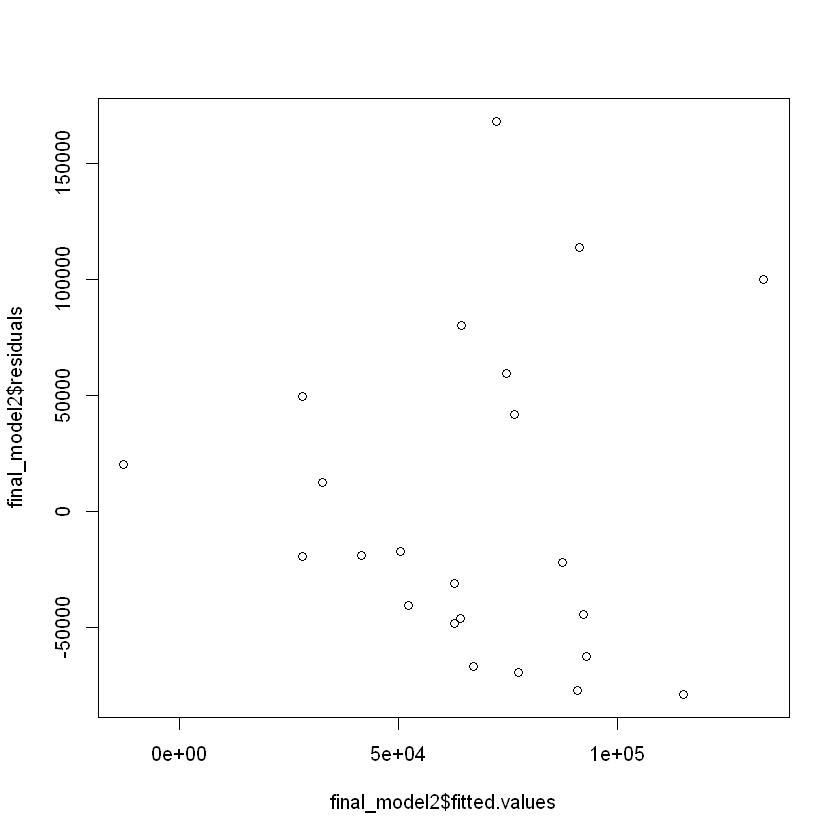

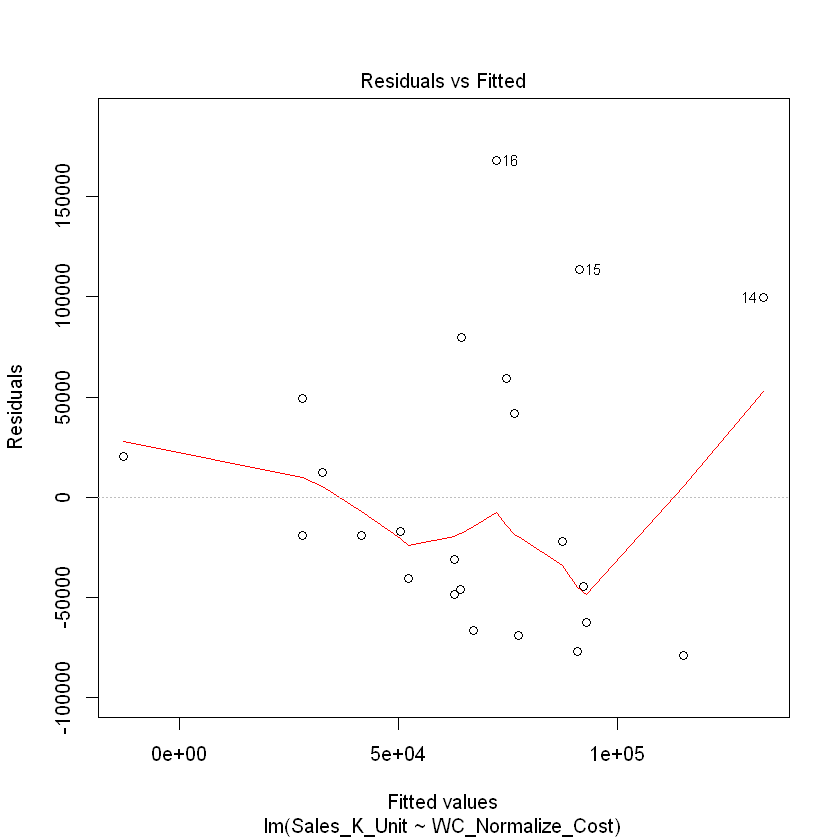

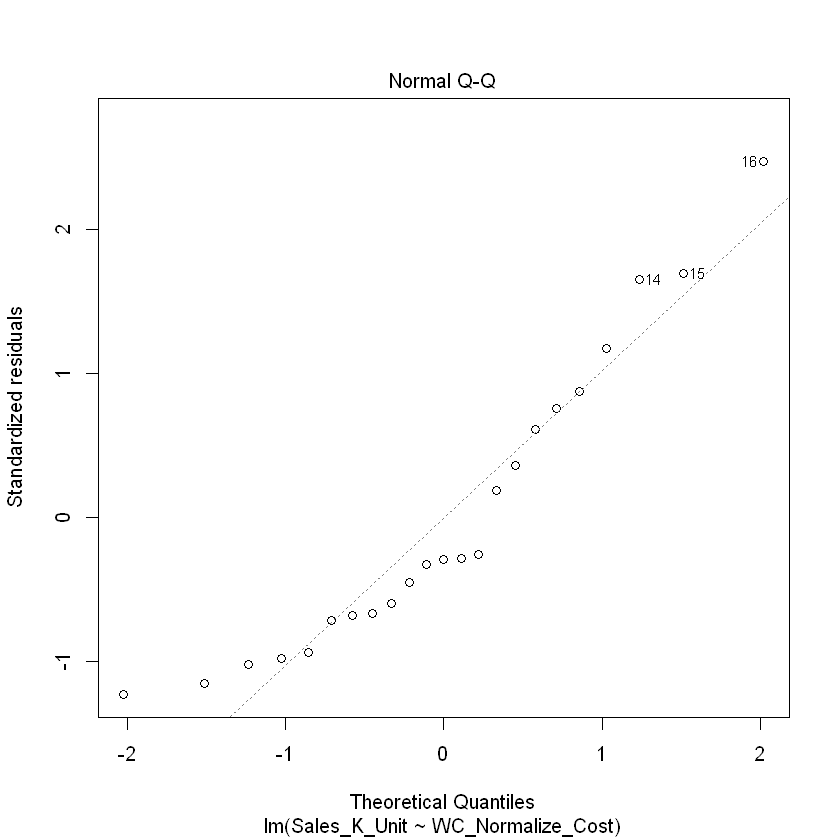

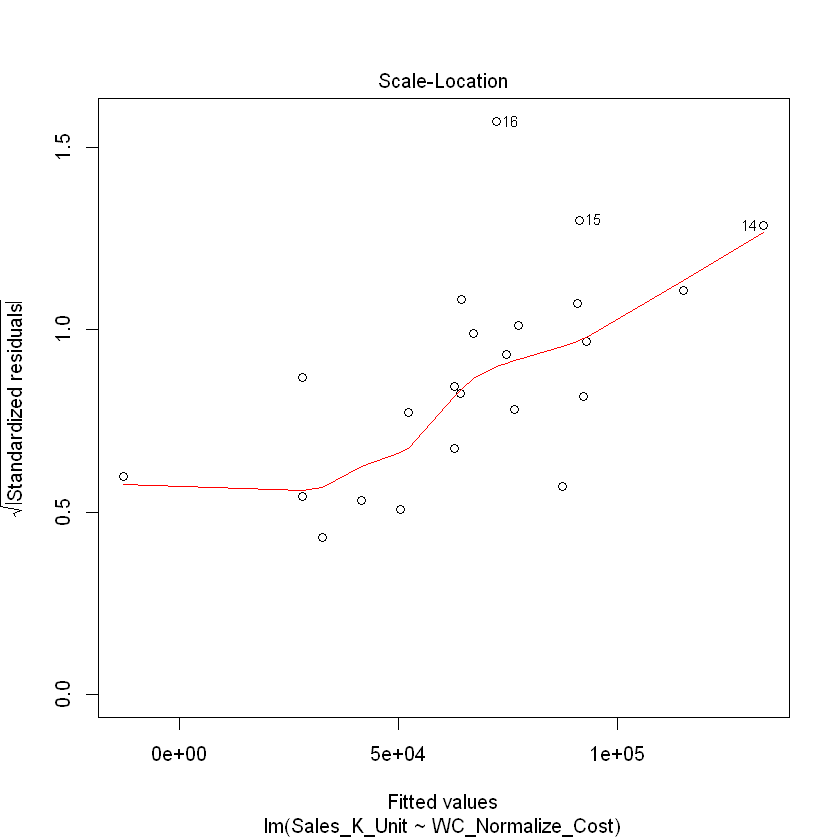

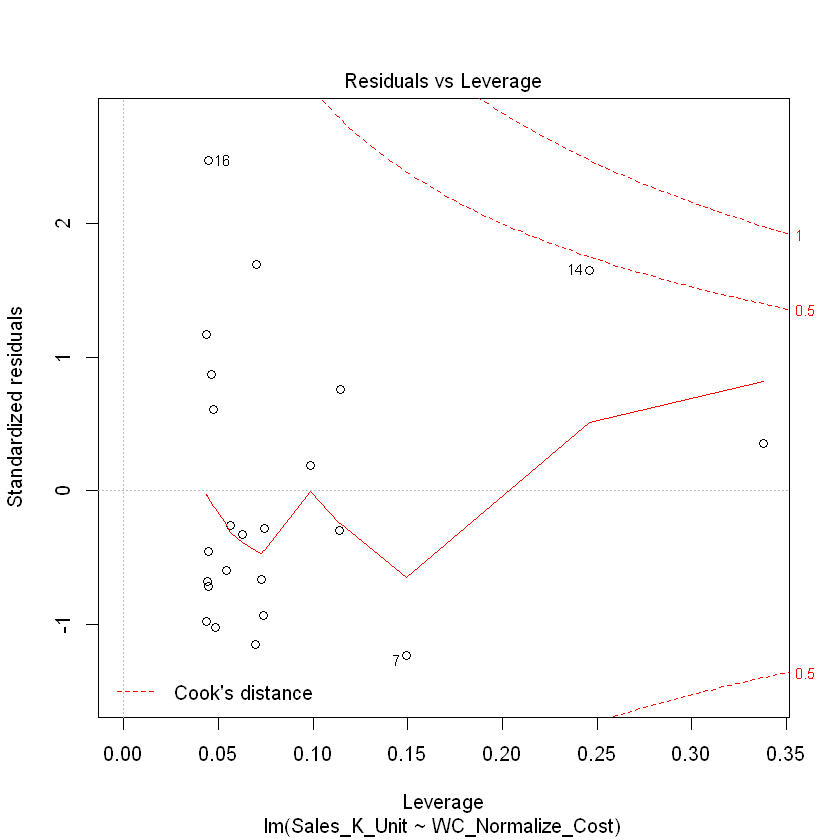

In [10]:
plot(final_model2$fitted.values, final_model2$residuals)
plot(final_model2) # plot 1 is fitted vs residual, plot 2 is QQ plot: depart from normal residuals

In [11]:
# 2. Homoskedasticity: pass - variance is constant
ols_test_breusch_pagan(final_model2)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                  Data                   
 ----------------------------------------
 Response : Sales_K_Unit 
 Variables: fitted values of Sales_K_Unit 

        Test Summary          
 -----------------------------
 DF            =    1 
 Chi2          =    2.958042 
 Prob > Chi2   =    0.08545136 

In [12]:
model3 <- glm(Adj_Sales ~ WC_Normalize_Functional +
                         WC_Normalize_Experimental +
                         # WC_Normalize_Symbolic+
                         WC_Normalize_Cost +
                         WC_Normalize_Functional : WC_Normalize_Optimistic+
                         WC_Normalize_Experimental : WC_Normalize_Optimistic+
                         WC_Normalize_Symbolic : WC_Normalize_Optimistic+
                         WC_Normalize_Cost : WC_Normalize_Optimistic+
                         WC_Normalize_Functional : WC_Normalize_Affective+
                         WC_Normalize_Experimental : WC_Normalize_Affective
                         # WC_Normalize_Symbolic : WC_Normalize_Affective+
                         # WC_Normalize_Cost : WC_Normalize_Affective
             , data = data)

null_model <- glm(Adj_Sales ~ 1, data = data)

final_model3 <- stepAIC(model3, direction="backward")

summary(final_model3)

Start:  AIC=330.77
Adj_Sales ~ WC_Normalize_Functional + WC_Normalize_Experimental + 
    WC_Normalize_Cost + WC_Normalize_Functional:WC_Normalize_Optimistic + 
    WC_Normalize_Experimental:WC_Normalize_Optimistic + WC_Normalize_Symbolic:WC_Normalize_Optimistic + 
    WC_Normalize_Cost:WC_Normalize_Optimistic + WC_Normalize_Functional:WC_Normalize_Affective + 
    WC_Normalize_Experimental:WC_Normalize_Affective

                                                    Df Deviance    AIC
- WC_Normalize_Optimistic:WC_Normalize_Symbolic      1   911549 328.78
- WC_Normalize_Experimental:WC_Normalize_Optimistic  1   928256 329.20
- WC_Normalize_Functional:WC_Normalize_Affective     1   963820 330.06
- WC_Normalize_Functional:WC_Normalize_Optimistic    1   986944 330.61
<none>                                                   911187 330.77
- WC_Normalize_Experimental:WC_Normalize_Affective   1  1094010 332.98
- WC_Normalize_Cost:WC_Normalize_Optimistic          1  1216932 335.43

Step:  AIC=32


Call:
glm(formula = Adj_Sales ~ WC_Normalize_Functional + WC_Normalize_Experimental + 
    WC_Normalize_Cost + WC_Normalize_Functional:WC_Normalize_Optimistic + 
    WC_Normalize_Cost:WC_Normalize_Optimistic + WC_Normalize_Experimental:WC_Normalize_Affective, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-372.72  -138.63   -16.17   120.26   510.96  

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                       7.445e+01  5.448e+02   0.137
WC_Normalize_Functional                          -1.034e+04  4.797e+03  -2.156
WC_Normalize_Experimental                         8.514e+03  5.088e+03   1.673
WC_Normalize_Cost                                 3.706e+04  1.841e+04   2.013
WC_Normalize_Functional:WC_Normalize_Optimistic   5.545e+05  1.405e+05   3.947
WC_Normalize_Cost:WC_Normalize_Optimistic        -1.554e+06  5.609e+05  -2.771
WC_Normalize_Experimental:WC_Normalize_

In [13]:
##########################################################
# fine-tune final model
##########################################################
final_model3 <- lm(Adj_Sales ~ WC_Normalize_Functional + WC_Normalize_Experimental + 
                    WC_Normalize_Cost + WC_Normalize_Functional:WC_Normalize_Optimistic + 
                    WC_Normalize_Cost:WC_Normalize_Optimistic + WC_Normalize_Experimental:WC_Normalize_Affective, 
                  data = data)

summary(final_model3)


Call:
lm(formula = Adj_Sales ~ WC_Normalize_Functional + WC_Normalize_Experimental + 
    WC_Normalize_Cost + WC_Normalize_Functional:WC_Normalize_Optimistic + 
    WC_Normalize_Cost:WC_Normalize_Optimistic + WC_Normalize_Experimental:WC_Normalize_Affective, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-372.72 -138.63  -16.17  120.26  510.96 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                       7.445e+01  5.448e+02   0.137
WC_Normalize_Functional                          -1.034e+04  4.797e+03  -2.156
WC_Normalize_Experimental                         8.514e+03  5.088e+03   1.673
WC_Normalize_Cost                                 3.706e+04  1.841e+04   2.013
WC_Normalize_Functional:WC_Normalize_Optimistic   5.545e+05  1.405e+05   3.947
WC_Normalize_Cost:WC_Normalize_Optimistic        -1.554e+06  5.609e+05  -2.771
WC_Normalize_Experimental:WC_Normalize_Affective -5.867e+05 

In [14]:
# model assumption - 
# 1. VIF: 5 being threshold to remove variables
vif(final_model3)

WC_Normalize_Functional 
                                        2.593704 
                       WC_Normalize_Experimental 
                                        3.895899 
                               WC_Normalize_Cost 
                                        9.958058 
 WC_Normalize_Functional:WC_Normalize_Optimistic 
                                        3.402135 
       WC_Normalize_Cost:WC_Normalize_Optimistic 
                                       11.989476 
WC_Normalize_Experimental:WC_Normalize_Affective 
                                        3.234612

In [15]:
# 2. residual is normal: pass
ols_test_normality(final_model3$residuals)$kolmogorv


	One-sample Kolmogorov-Smirnov test

data:  y
D = 0.11632, p-value = 0.8796
alternative hypothesis: two-sided


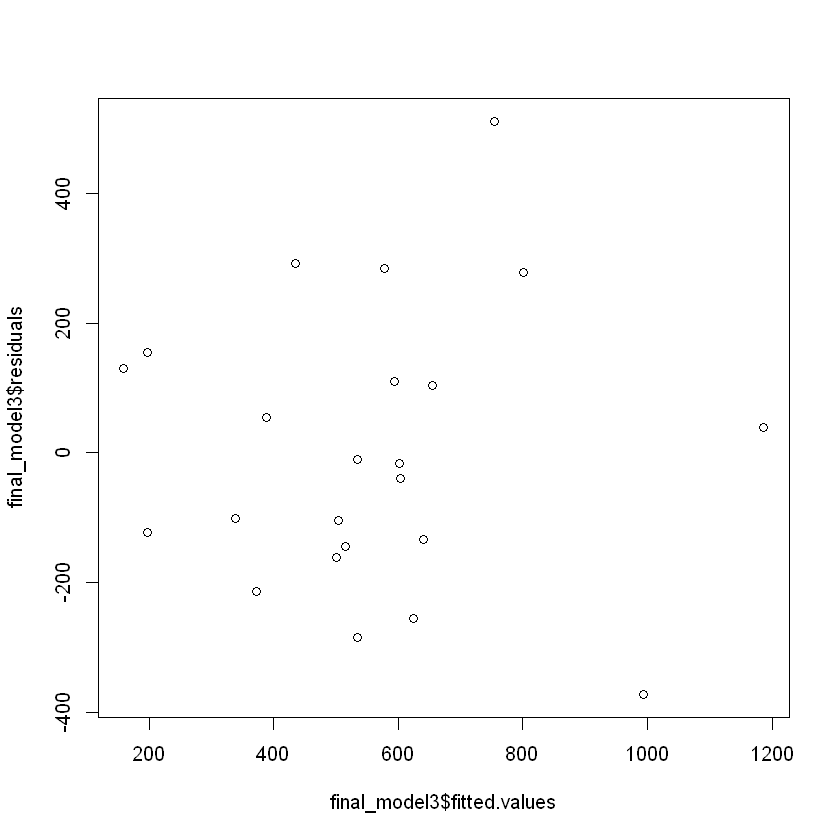

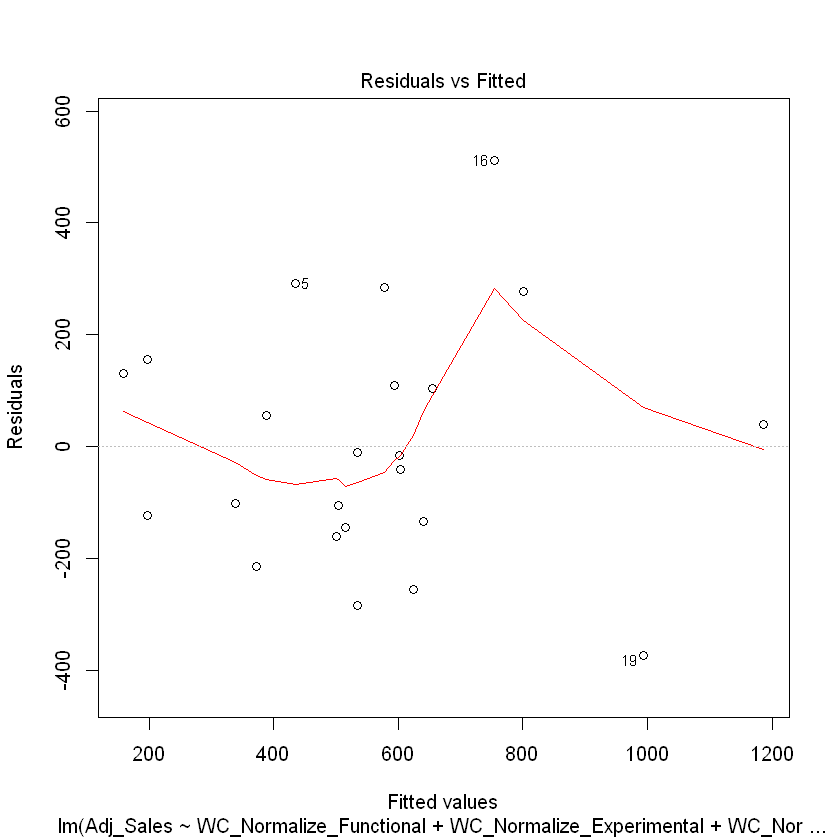

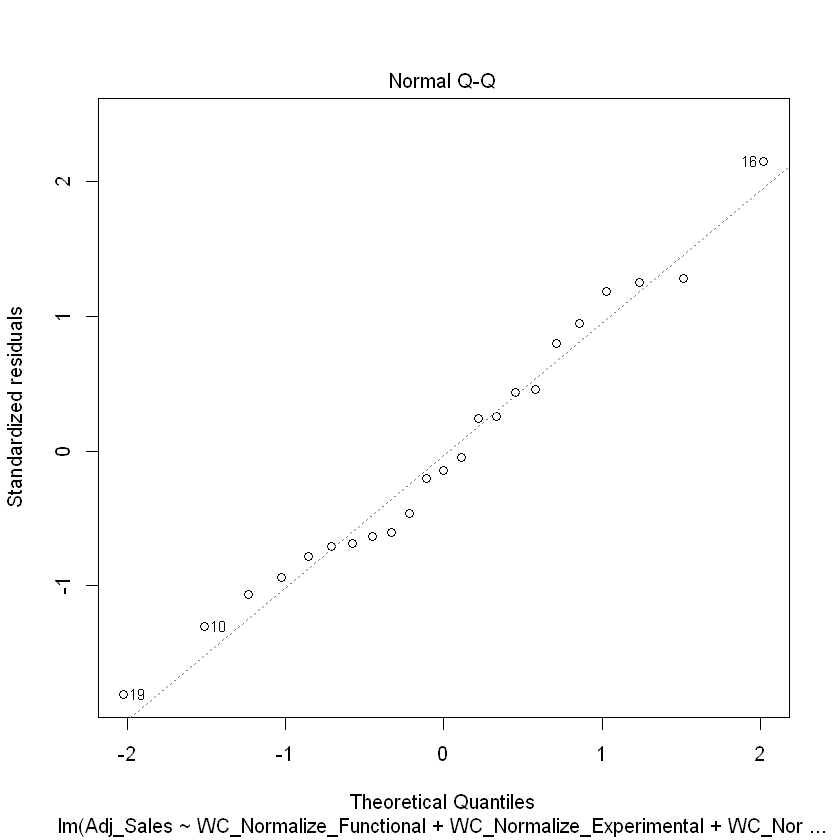

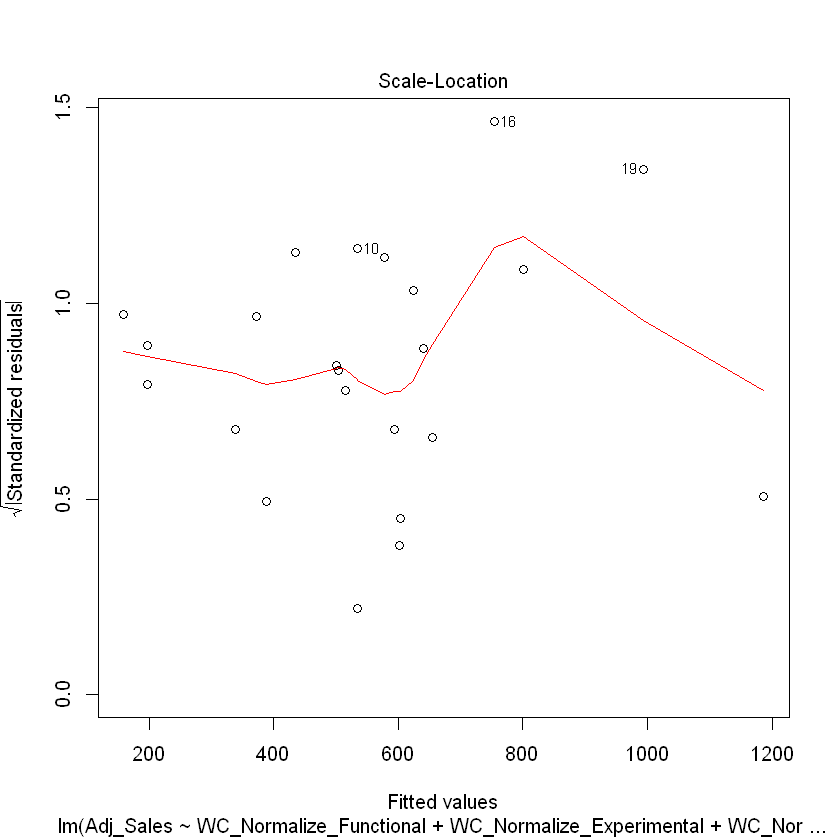

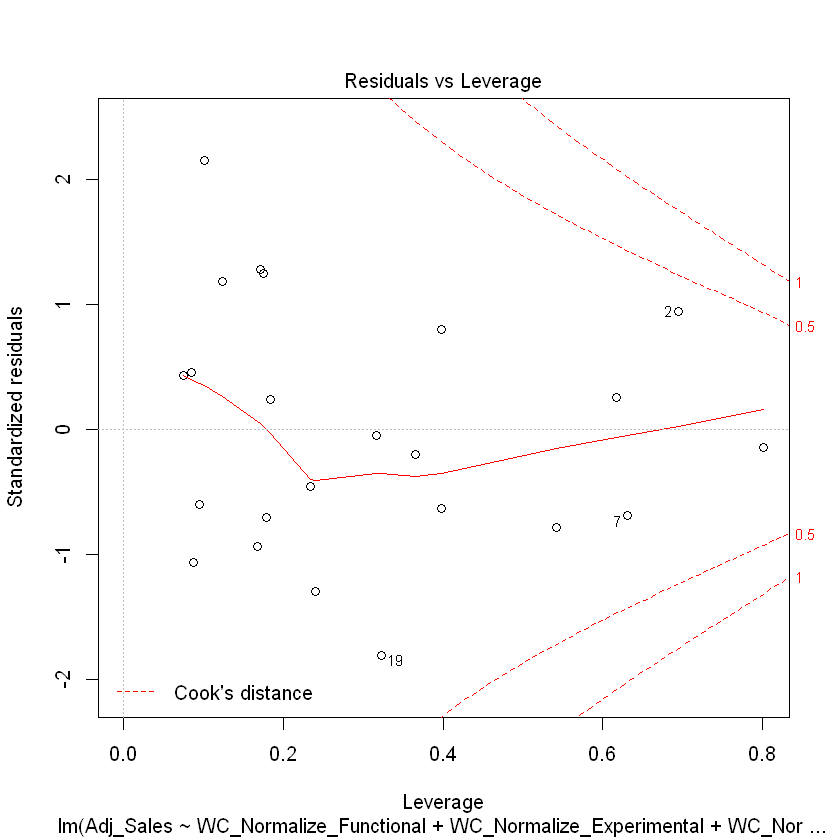

In [16]:
plot(final_model3$fitted.values, final_model3$residuals)
plot(final_model3) # plot 1 is fitted vs residual, plot 2 is QQ plot: fairly normal residuals

In [17]:
# 3. Homoskedasticity: pass - variance is constant
ols_test_breusch_pagan(final_model3)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                Data                  
 -------------------------------------
 Response : Adj_Sales 
 Variables: fitted values of Adj_Sales 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    2.002765 
 Prob > Chi2   =    0.1570126 